# Jason Rodrigues

## THE SPARKS FOUNDATION

## Data Science and Business Analytics

### TASK 04: Exploratory Data Analysis - Global Terrorism (*As a security analyst,try to find out the hot zone of terrorism*)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np

### Reading the dataset

In [3]:
dataset_link = "globalterrorism"
df = pd.read_csv("globalterrorism.csv", encoding='ISO-8859-1')
df.sample(5)

C:\Users\Jason\AppData\Local\Temp\ipykernel_8168\1900980661.py:2: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("globalterrorism.csv", encoding='ISO-8859-1')


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
108566,2.012060e+11,2012,6,11,NaN,0,NaN,153,Pakistan,6,...,NaN,"""Pakistan: Three killed in Tirah blasts,"" Righ...","""Pakistan: Bomb blast claims two lives in ...","""Pakistan: Two peace body members among 3 kill...",START Primary Collection,0,0,0,0,"201206110024, 201206110032"
72661,2.001080e+11,2001,8,12,NaN,0,NaN,1003,Kosovo,9,...,NaN,Albanian Extremists Throw Hand Thrown at Se...,NaN,NaN,CETIS,1,1,1,1,NaN
55898,1.994040e+11,1994,4,10,NaN,0,NaN,603,United Kingdom,8,...,NaN,NaN,NaN,NaN,PGIS,0,0,1,1,NaN
93288,2.009080e+11,2009,8,20,NaN,0,NaN,4,Afghanistan,6,...,NaN,"Robert Spencer, Jihad Watch, ""Taliban Cuts Off...","The Statesman, ""Taliban Cut Off Fingers of Two...",NaN,ISVG,0,0,0,0,NaN
174690,2.017050e+11,2017,5,13,NaN,0,NaN,60,Egypt,10,...,NaN,"""Roundup on Security Situation in Sinai 14 May...","""Egyptian colonel killed in bomb attack on arm...",NaN,START Primary Collection,0,0,0,0,NaN


In [4]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [5]:
df.shape

(181691, 135)

### Renaming the columns

In [6]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)

### Extracting the required data

In [7]:
df = df[['Year','Month','day','Country','State','Region','City','latitude','longitude',"Attacktype",'kill',
               'Wound','target1','summary','Group','Targettype','Weapon','motive']]

In [8]:
df.head(7)

,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN
5,1970,1,1,United States,Illinois,North America,Cairo,37.005105,-89.176269,Armed Assault,0.0,0.0,Cairo Police Headquarters,1/1/1970: Unknown African American assailants ...,Black Nationalists,Police,Firearms,To protest the Cairo Illinois Police Deparment
6,1970,1,2,Uruguay,Montevideo,South America,Montevideo,-34.891151,-56.187214,Assassination,0.0,0.0,Juan Maria de Lucah/Chief of Directorate of in...,NaN,Tupamaros (Uruguay),Police,Firearms,NaN


### Checking if there are any null values

In [9]:
df.isnull().sum()

Year               0
Month              0
day                0
Country            0
State            421
Region             0
City             434
latitude        4556
longitude       4557
Attacktype         0
kill           10313
Wound          16311
target1          636
summary        66129
Group              0
Targettype         0
Weapon             0
motive        131130
dtype: int64

### Filling the null values

In [10]:
df.fillna(0,inplace=True)

In [11]:
df.isnull().sum()


Year          0
Month         0
day           0
Country       0
State         0
Region        0
City          0
latitude      0
longitude     0
Attacktype    0
kill          0
Wound         0
target1       0
summary       0
Group         0
Targettype    0
Weapon        0
motive        0
dtype: int64

### If there are any duplicate values then handling them

In [12]:
df.duplicated().sum()

9530

In [13]:
df.drop_duplicates(inplace=True)


In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(172161, 18)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172161 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Year        172161 non-null  int64  
 1   Month       172161 non-null  int64  
 2   day         172161 non-null  int64  
 3   Country     172161 non-null  object 
 4   State       172161 non-null  object 
 5   Region      172161 non-null  object 
 6   City        172161 non-null  object 
 7   latitude    172161 non-null  float64
 8   longitude   172161 non-null  float64
 9   Attacktype  172161 non-null  object 
 10  kill        172161 non-null  float64
 11  Wound       172161 non-null  float64
 12  target1     172161 non-null  object 
 13  summary     172161 non-null  object 
 14  Group       172161 non-null  object 
 15  Targettype  172161 non-null  object 
 16  Weapon      172161 non-null  object 
 17  motive      172161 non-null  object 
dtypes: float64(4), int64(3), object(11)
memory u

In [17]:
df.describe()

,Year,Month,day,latitude,longitude,kill,Wound
count,172161.000000,172161.000000,172161.000000,172161.000000,1.721610e+05,172161.000000,172161.000000
mean,2003.055251,6.470333,15.517620,23.224858,-4.718067e+02,2.371275,3.025203
std,13.188771,3.391811,8.814383,18.434627,2.077155e+05,11.511230,35.235152
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,10.241540,3.055413e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.250196,4.314357e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.533753,6.871401e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


### Number of Attacks occured each year

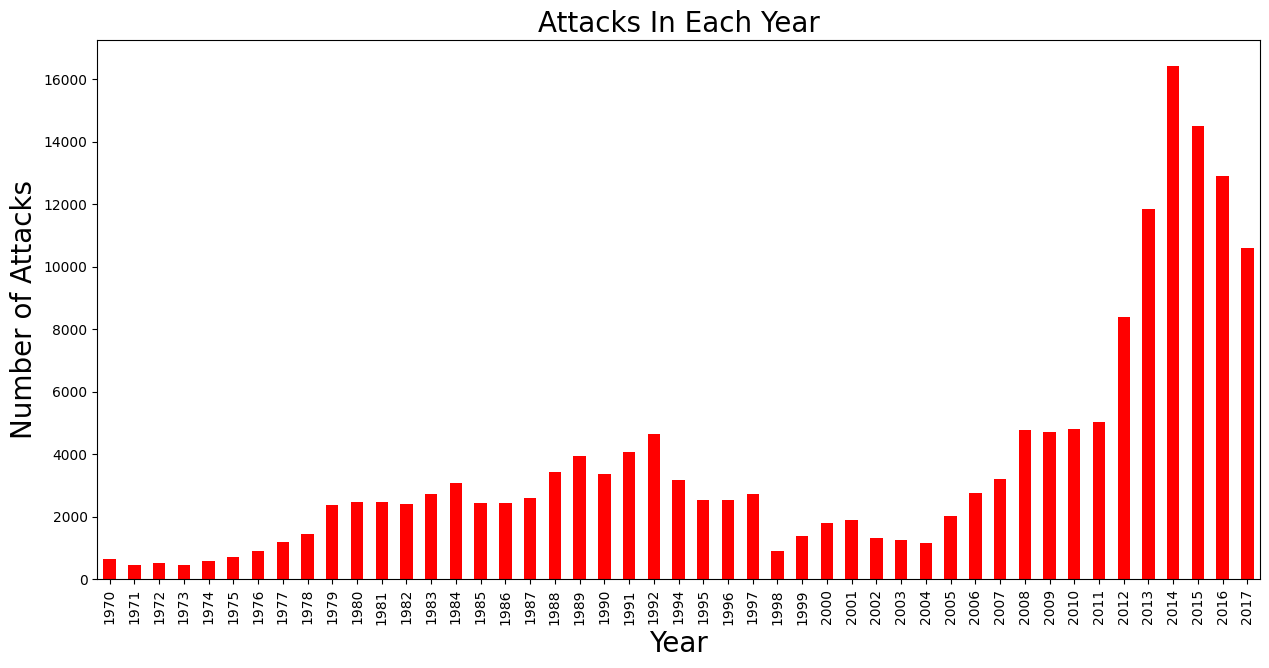

In [17]:
plt.figure(figsize=(15,7))
df.Year.value_counts().sort_index().plot(kind='bar',color="red")
plt.xlabel('Year',fontsize=20)
plt.ylabel('Number of Attacks',fontsize=20)
plt.title('Attacks In Each Year',fontsize=20)
plt.show()

### Top 10 most attacked countries

In [18]:
attack = df.Country.value_counts()[:10]
attack

Iraq              23459
Pakistan          13795
Afghanistan       12511
India             11585
Colombia           7502
Philippines        6771
Peru               5046
United Kingdom     4997
El Salvador        4296
Somalia            4121
Name: Country, dtype: int64

### Most prevalent terrorist organisation 

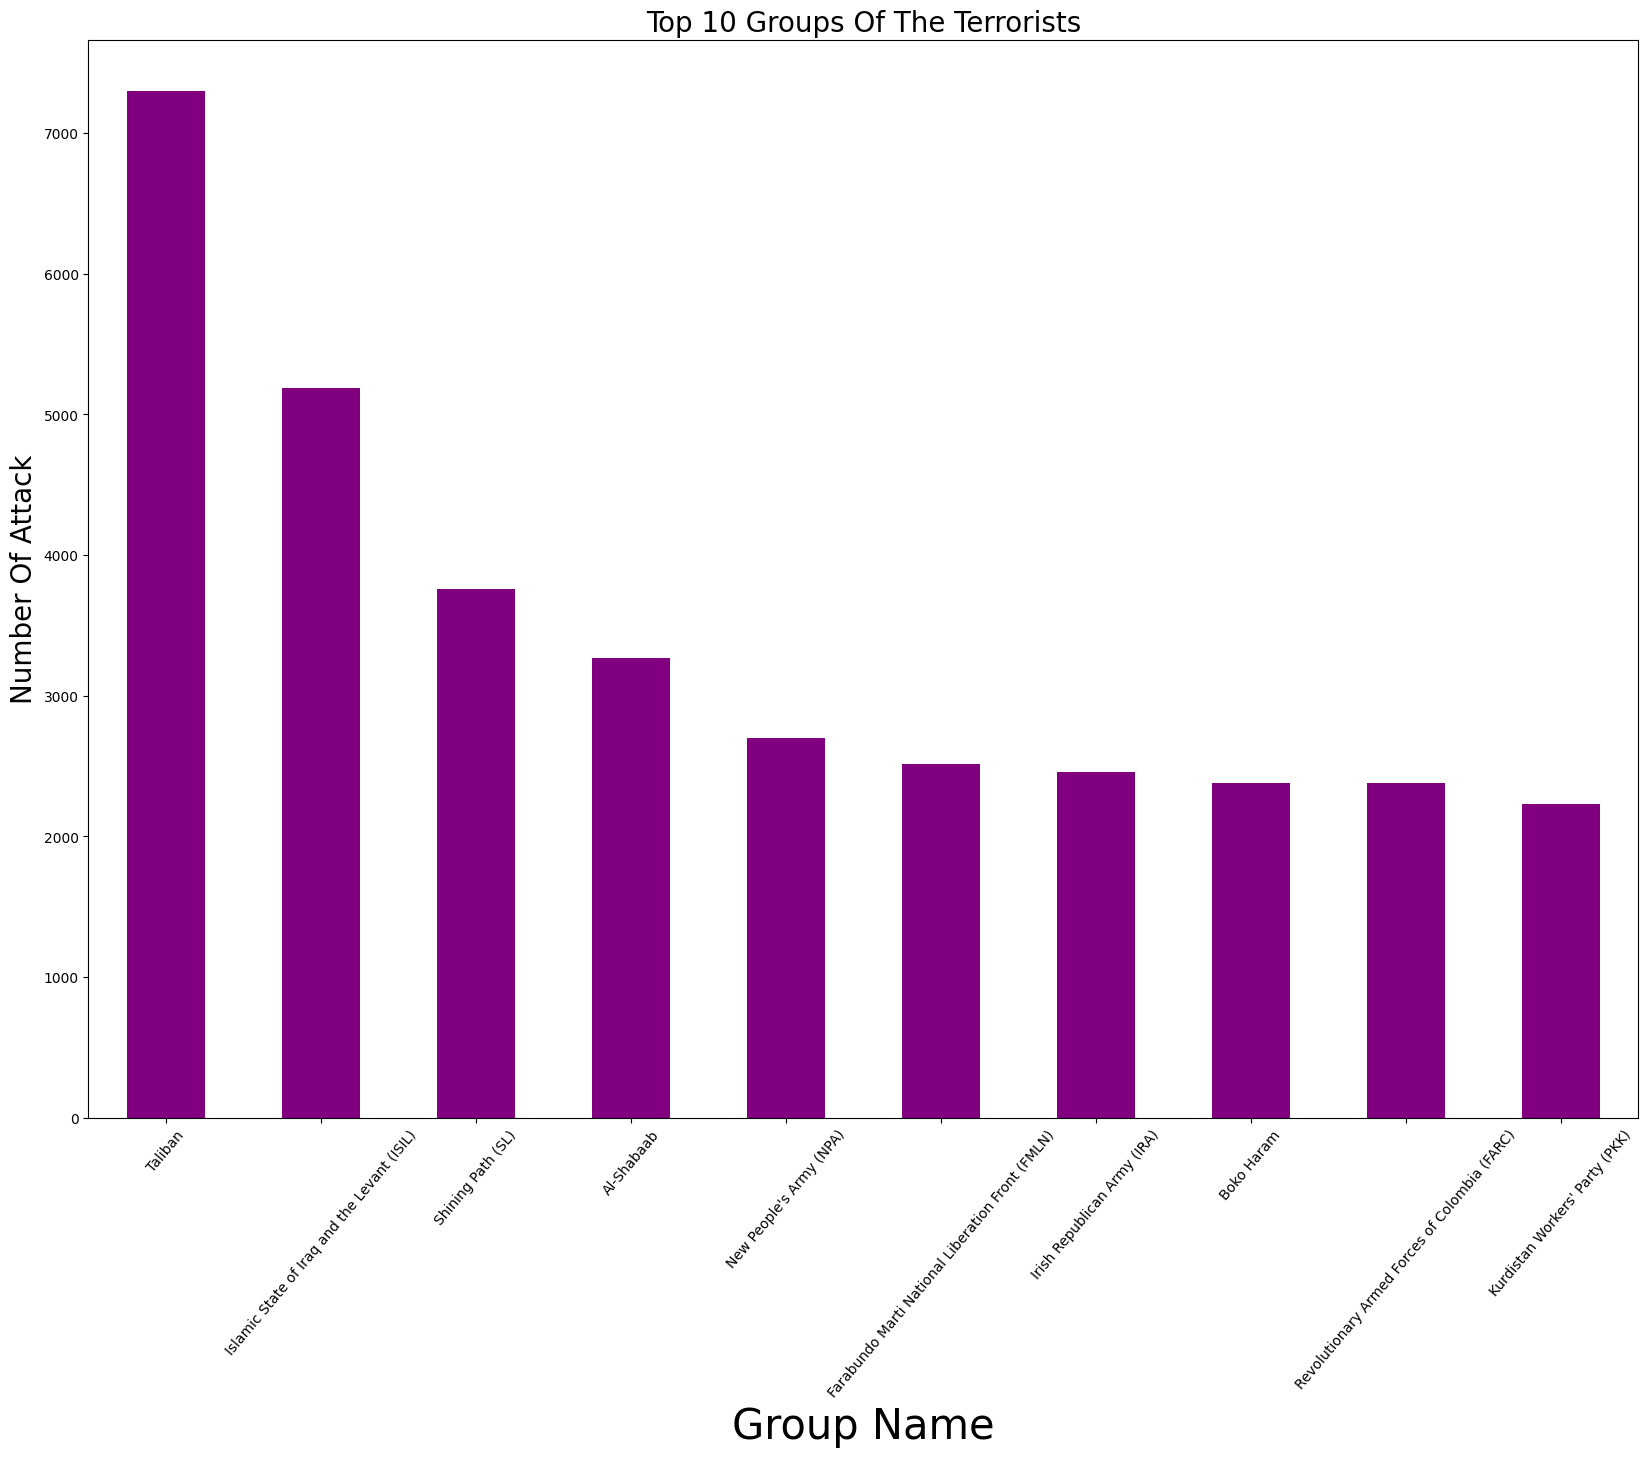

In [19]:
plt.figure(figsize=(20,14))
df["Group"].value_counts()[1:11].plot(kind='bar',color='purple')
plt.xticks(rotation=50)
plt.xlabel('Group Name',fontsize=30)
plt.ylabel('Number Of Attack',fontsize=20)
plt.title('Top 10 Groups Of The Terrorists',fontsize=20)
plt.show()

### Terrorist organisation activities in regions per year

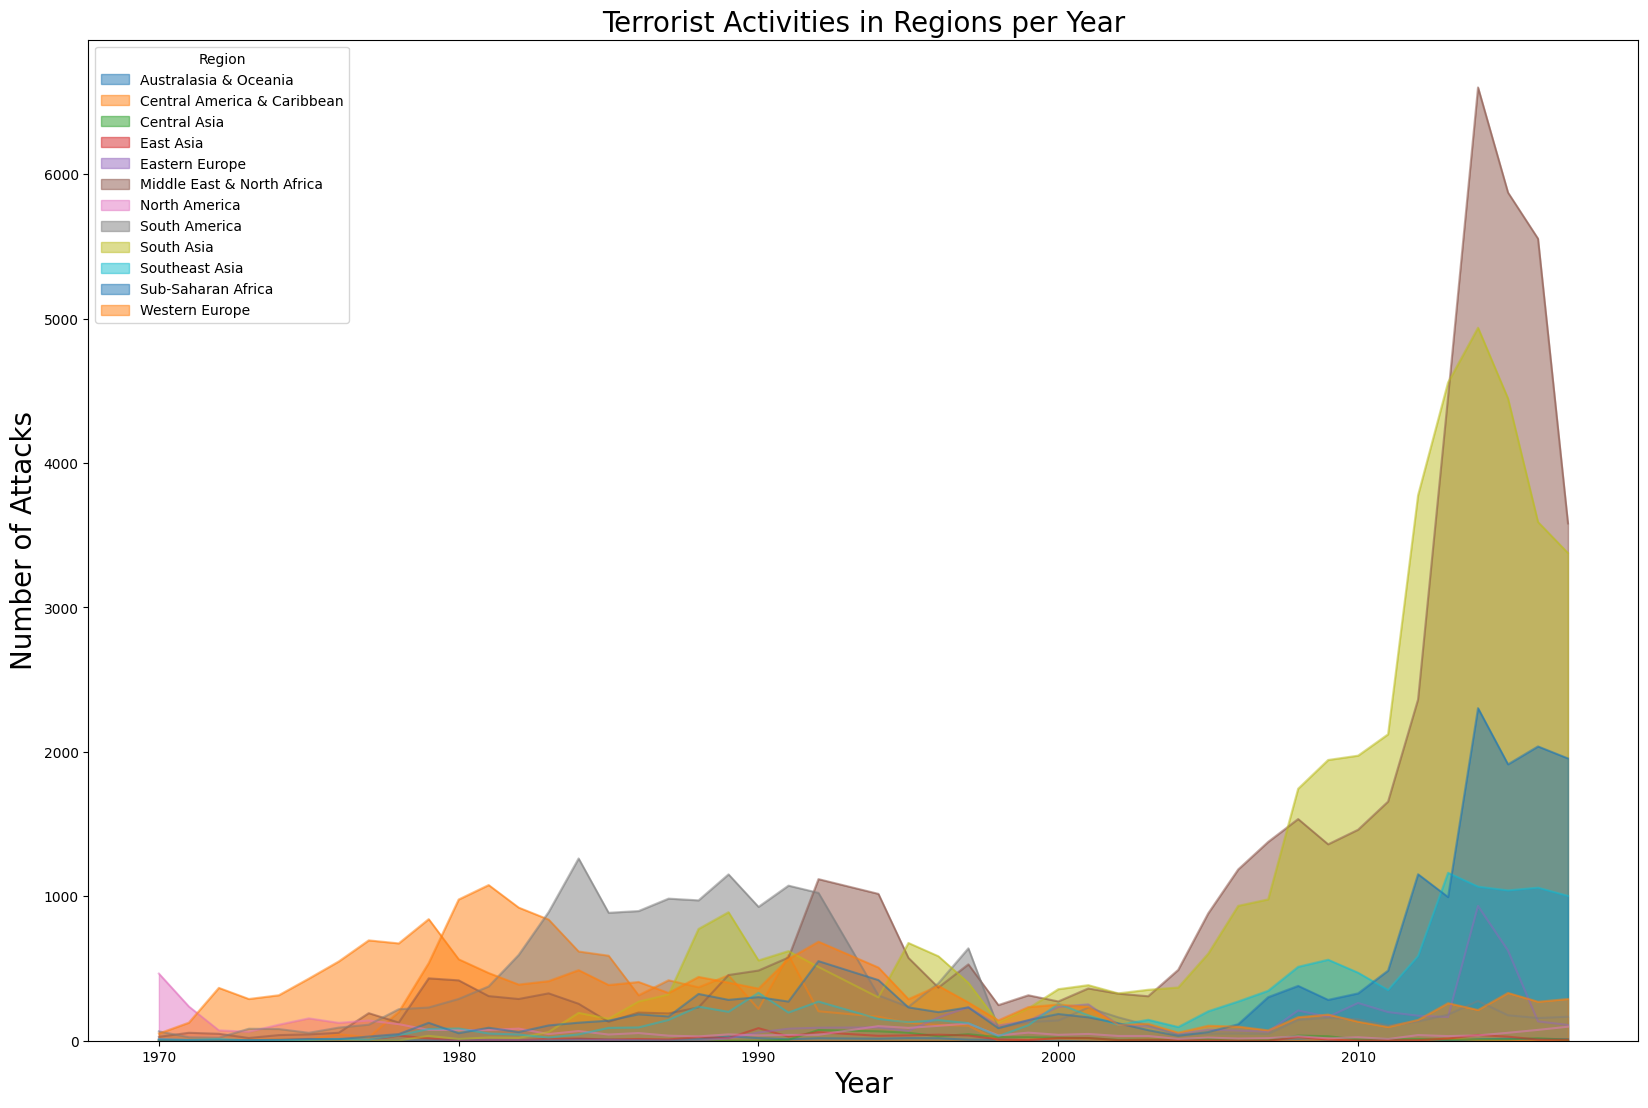

In [20]:
pd.crosstab(df.Year, df.Region).plot(kind='area',stacked=False,figsize=(20,13))
plt.title('Terrorist Activities in Regions per Year',fontsize=20)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.show()

### Top 15 most attacked countries

In [22]:
attack = df.Country.value_counts()[:15]
attack

Iraq              23459
Pakistan          13795
Afghanistan       12511
India             11585
Colombia           7502
Philippines        6771
Peru               5046
United Kingdom     4997
El Salvador        4296
Somalia            4121
Turkey             4081
Nigeria            3828
Thailand           3740
Yemen              3305
Spain              3070
Name: Country, dtype: int64

### Total attacks by terrorist organisations

In [23]:
df.Group.value_counts()[1:15]

Taliban                                             7300
Islamic State of Iraq and the Levant (ISIL)         5187
Shining Path (SL)                                   3756
Al-Shabaab                                          3266
New People's Army (NPA)                             2697
Farabundo Marti National Liberation Front (FMLN)    2512
Irish Republican Army (IRA)                         2460
Boko Haram                                          2381
Revolutionary Armed Forces of Colombia (FARC)       2377
Kurdistan Workers' Party (PKK)                      2233
Basque Fatherland and Freedom (ETA)                 1899
Communist Party of India - Maoist (CPI-Maoist)      1852
Maoists                                             1608
Liberation Tigers of Tamil Eelam (LTTE)             1573
Name: Group, dtype: int64

### Type of attack 

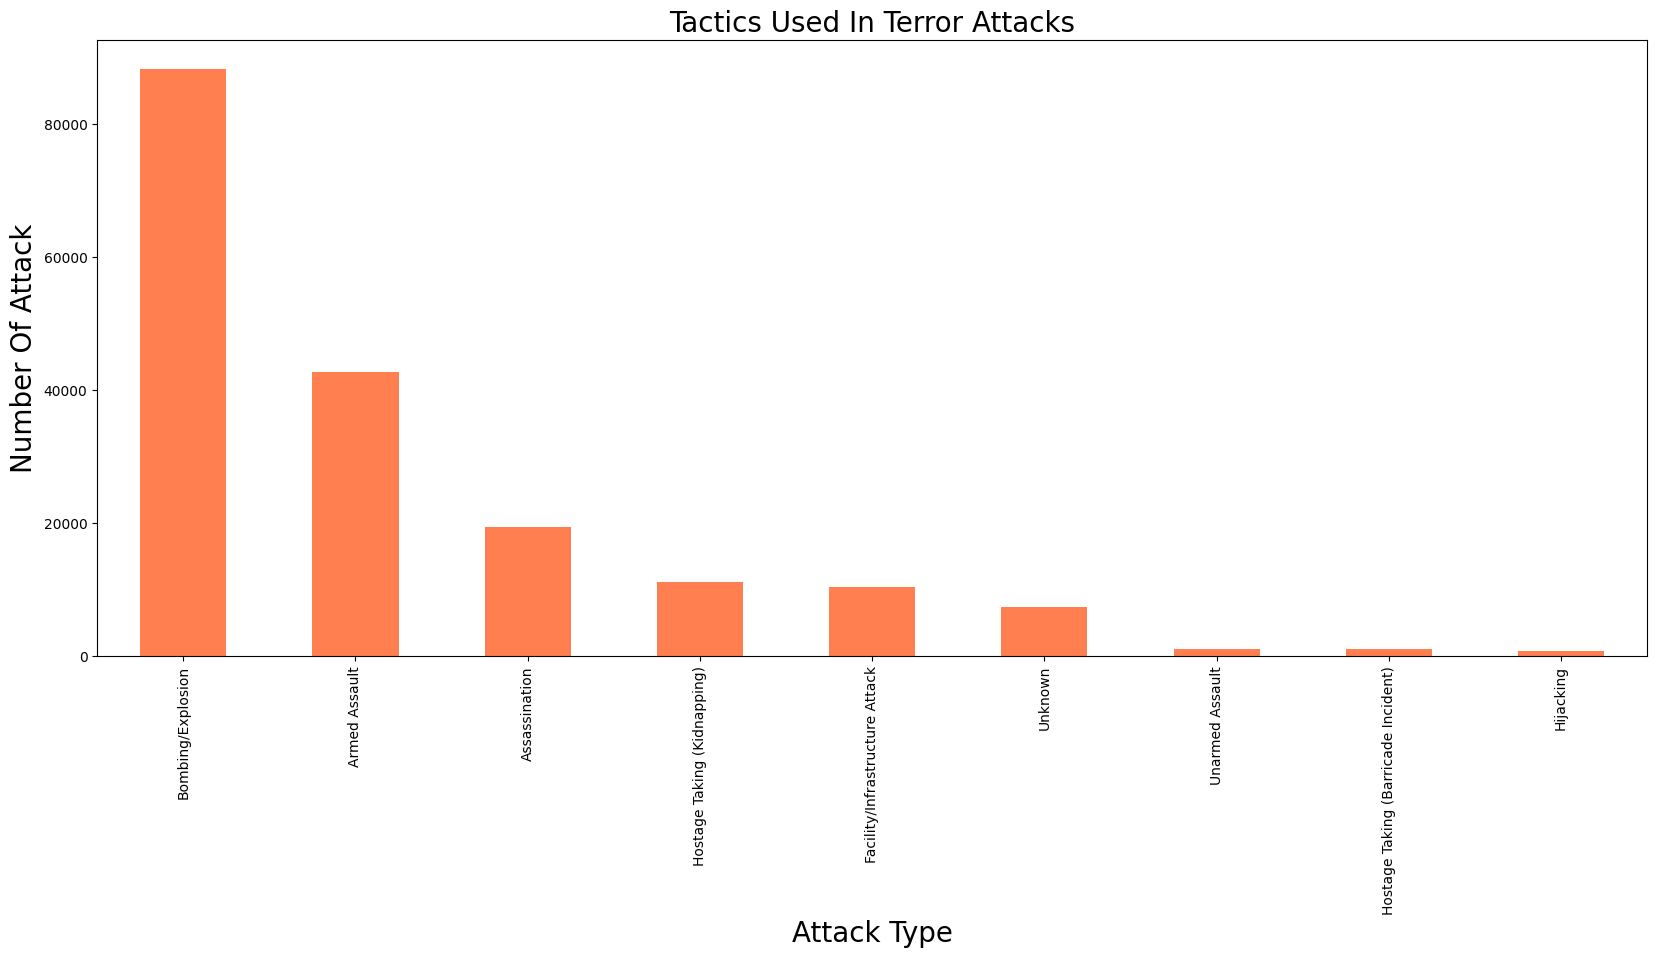

In [40]:
plt.figure(figsize=(20,8))
df["Attacktype"].value_counts().plot(kind='bar',color='coral')
plt.xlabel('Attack Type',fontsize=20)
plt.ylabel('Number Of Attack',fontsize=20)
plt.title('Tactics Used In Terror Attacks',fontsize=20)
plt.show()

### Most used weapons in the attack

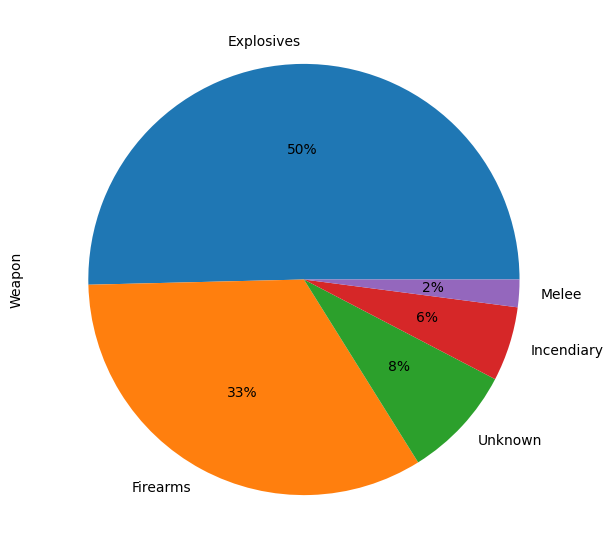

In [25]:
plt.figure(figsize=(18,7))
df.Weapon.value_counts()[:5].plot(kind='pie',explode=[0,0,0,0,0],autopct='%1.0f%%')
plt.show()

### Total killings occured per year

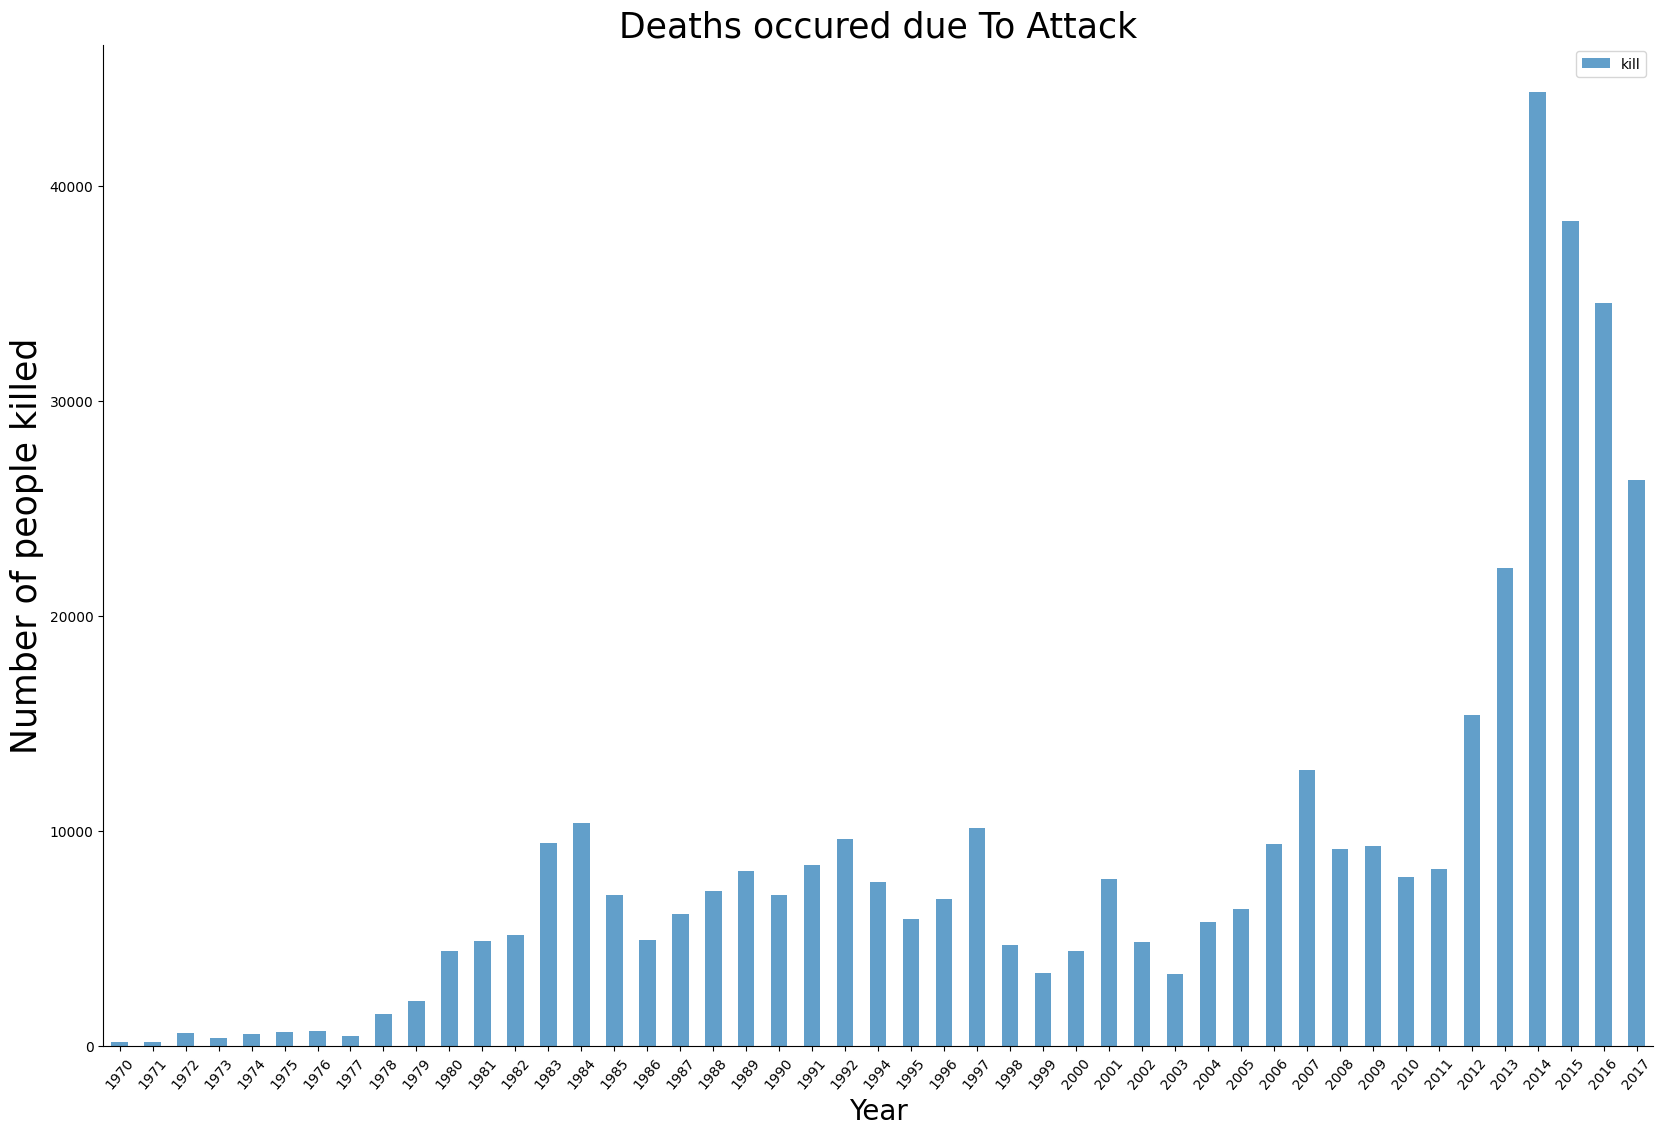

In [26]:
df = df[['Year','kill']].groupby(['Year']).sum()
fig, ax4 = plt.subplots(figsize=(20,13))
df.plot(kind='bar',alpha=0.7,ax=ax4)
plt.xticks(rotation = 50)
plt.title("Deaths occured due To Attack",fontsize=25)
plt.ylabel("Number of people killed",fontsize=25)
plt.xlabel('Year',fontsize=20)
top_side = ax4.spines["top"]
top_side.set_visible(False)
right_side = ax4.spines["right"]
right_side.set_visible(False)

###  Total killing by Attack Type

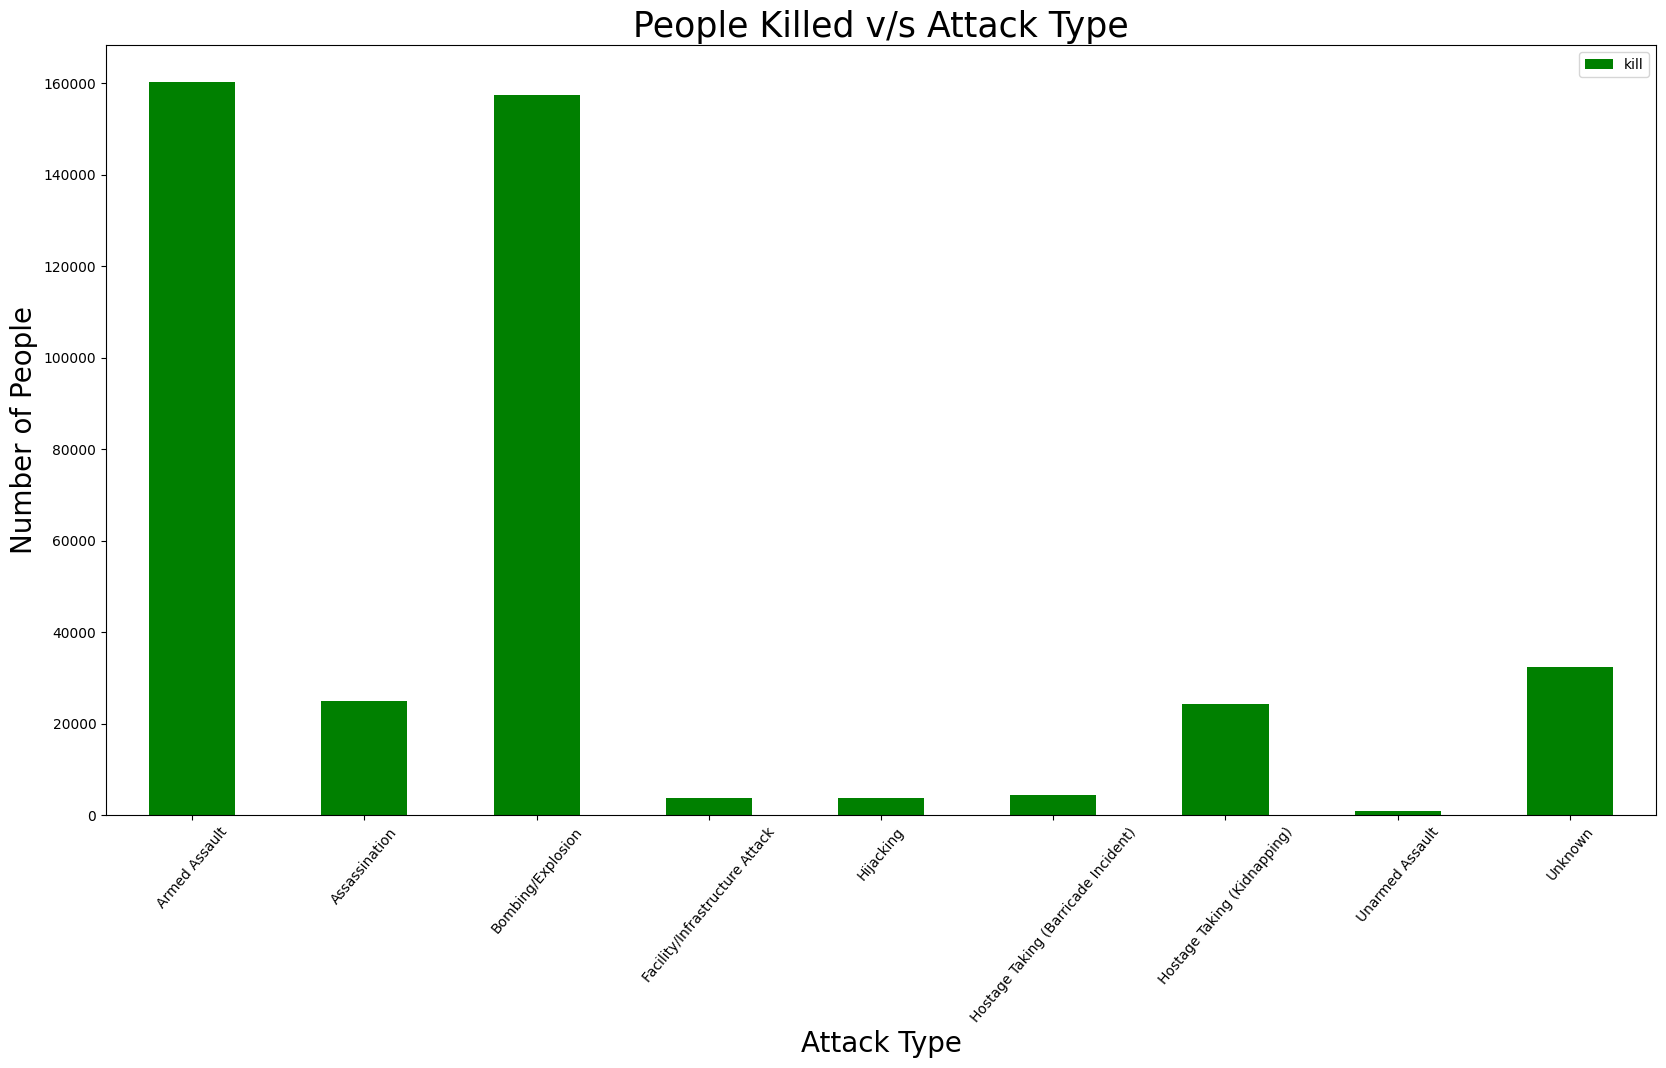

In [41]:
df[['Attacktype','kill']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',color="green",figsize=(20,10))
plt.xticks(rotation=50)
plt.title("People Killed v/s Attack Type",fontsize=25)
plt.ylabel('Number of People',fontsize=20)
plt.xlabel('Attack Type',fontsize=20)
plt.show()

### Top 15 organizational kills in Countries.


In [9]:
df=df[['Group','Country','kill']]
df=df.groupby(['Group','Country'],axis=0).sum().sort_values('kill',ascending=False).drop('Unknown').reset_index().head(15)
df

C:\Users\Jason\AppData\Local\Temp\ipykernel_8168\3491163686.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df=df.groupby(['Group','Country'],axis=0).sum().sort_values('kill',ascending=False).drop('Unknown').reset_index().head(15)


,Group,Country,kill
0,Islamic State of Iraq and the Levant (ISIL),Iraq,31058.0
1,Taliban,Afghanistan,29269.0
2,Boko Haram,Nigeria,16917.0
3,Shining Path (SL),Peru,11595.0
4,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0
5,Al-Shabaab,Somalia,8176.0
6,Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
7,Islamic State of Iraq and the Levant (ISIL),Syria,6883.0
8,Nicaraguan Democratic Force (FDN),Nicaragua,6630.0
9,Tehrik-i-Taliban Pakistan (TTP),Pakistan,6014.0


### Total People Killed In Terrorist Attack

In [11]:
df["kill"].sum()

158140.0

### Number of people killed in countries

In [21]:
countryKill = df.pivot_table(columns='Country', values='kill', aggfunc='sum')
countryKill

Country,Afghanistan,Colombia,El Salvador,Iraq,Nicaragua,Nigeria,Pakistan,Peru,Philippines,Somalia,Sri Lanka,Syria,Turkey,Yemen
kill,29269.0,5644.0,8019.0,35331.0,6630.0,16917.0,6014.0,11595.0,4385.0,8176.0,10928.0,6883.0,4845.0,3504.0


## Conclusion